## Introduction ##

In this notebook I try to use direct approaches to estimate the weights of SNP 500 constituents. These ultimately end up being unsuccessful because of the colinearity of constituents (correlation between assets make them difficult to distinguish in a matrix/regression), and the sheer number of them. The large number of correlated constituents make these methods only compatible with extremely large sets of unique data points. The size of the datasets we can use is limited, as our weights change over time. This means that the assumption that they are some fixed parameters we can directly approximate is only valid over relatively short periods of time, where this change is negligible. On top of this, given we are using a time series, increasing data frequency has limited benefits as these additional datapoints are almost identical to those "around" it. In other words, the serial correlation of variables means that there is little new information carried by additional observations taken at times close to the observations we already have. 

Nevertheless, the attempt at applying these direct approaches can be found below.

# Set up and helpers

Imports:

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import requests
import numpy as np
from io import StringIO
import time
import math

In [2]:
TimePeriod = "6mo"
Frequency = "1h"
DataType = "Open"

General Utility Functions:

In [3]:
def CleanTickers(Tickers: list): # Cleans Tickers to ensure formatting of Class B stocks align with yfinance tickers. 
    for i, Ticker in enumerate(Tickers):
        Tickers[i] = Ticker.replace(".", "-")
    return Tickers

def NormaliseData(Data: pd.DataFrame, DataType: str, NormaliseMagnitude: bool):
    NewDataList = {}
    def PlugColumn(Ticker: str):
        print(Ticker, "Plugging")
        df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
        Data[DataType][Ticker] = df[DataType]

    def ColumnNotNaN(Ticker: str):
        ThresholdNaN = .2
        NaNs = 0
        if Ticker not in Data[DataType]:
            print("Ticker not found in Data")
            return False

        for j in Data[DataType][Ticker]:
            if math.isnan(j) == True: #False for testing pluggin
                NaNs += 1

        if len(Data.index) < 1:
            return False

        if float(NaNs)/float(len(Data.index)) > ThresholdNaN:
            # print(Data[DataType][Ticker])
            return False
        else:
            return True
            

    if DataType != "Open" and DataType != "Close":
        print("Invalid DataType")
        return

    for i in Data[DataType]:
        for k in range(10): # plugs gaps left by yfinance import by trying to download and fill missing columns individually.
            if ColumnNotNaN(i) == True:
                break
            else:
                PlugColumn(i)
        
        if ColumnNotNaN(i) == False:
            print("NaN Column found, and plugging failed. Error will occur if used.")
            continue #To not use columns with too many NaNs
        
        NewDataList[i] = Data[DataType][i].reset_index(drop = True) #Indexes with numbers for convenience, dates are irrelevant as long as periods are consistent. 
        if NormaliseMagnitude == True:
            NewDataList[i] /= NewDataList[i].loc[0] # normalising magnitudes
                
        
    # print(pd.DataFrame(NewDataList)
    return pd.DataFrame(NewDataList)
    

Data Downloading (1 month for most recent components, 15m to ensure sufficient frequency):

In [4]:
#SNP500 CloseData
SNPData = NormaliseData(yf.download("^GSPC", period = TimePeriod, interval = Frequency), DataType, True)

/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/3653252366.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SNPData = NormaliseData(yf.download("^GSPC", period = TimePeriod, interval = Frequency), DataType, True)
[*********************100%***********************]  1 of 1 completed


In [5]:
#Company Data (Most Recent SNP Components), chose the maintained wikipedia page as the source. 
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
html = requests.get(url, headers=headers).text
df_list = pd.read_html(StringIO(html))
df = df_list[0] # 0 or 1, if errors, try the other
tickers = CleanTickers(df['Symbol'].tolist())

CompanyData = NormaliseData(yf.download(tickers, period = TimePeriod, interval = Frequency), DataType, True)

/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2000585601.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  CompanyData = NormaliseData(yf.download(tickers, period = TimePeriod, interval = Frequency), DataType, True)
[*********************100%***********************]  502 of 502 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed

FISV Plugging
FISV Plugging



/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

FISV Plugging
FISV Plugging



/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

FISV Plugging
FISV Plugging
FISV Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

FISV Plugging
FISV Plugging
FISV Plugging


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

NaN Column found, and plugging failed. Error will occur if used.


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed

PSKY Plugging
PSKY Plugging



/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

PSKY Plugging
PSKY Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

PSKY Plugging
PSKY Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

PSKY Plugging
PSKY Plugging


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1

PSKY Plugging
PSKY Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

NaN Column found, and plugging failed. Error will occur if used.
Q Plugging
Q Plugging


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1

Q Plugging
Q Plugging



/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Q Plugging
Q Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Q Plugging
Q Plugging
Q Plugging


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1

Q Plugging
NaN Column found, and plugging failed. Error will occur if used.


/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed

SOLS Plugging
SOLS Plugging



/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

SOLS Plugging
SOLS Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

SOLS Plugging
SOLS Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

SOLS Plugging
SOLS Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, period = TimePeriod, interval = Frequency)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

SOLS Plugging
SOLS Plugging


[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/2834233741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[DataType][Ticker] = df[DataType]


NaN Column found, and plugging failed. Error will occur if used.


In [6]:
print(CompanyData)
print(SNPData)
N = CompanyData.shape[1]

            A      AAPL      ABBV      ABNB       ABT      ACGL       ACN  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.012219  1.013960  1.007513  1.017191  1.003062  0.995733  1.012646   
2    1.036104  1.006266  1.028863  1.023198  1.006825  1.001149  1.015799   
3    1.042745  1.005831  1.029242  1.028261  1.000295  0.998523  1.017476   
4    1.025630  1.006890  1.025188  1.028827  1.000221  0.997867  1.017543   
..        ...       ...       ...       ...       ...       ...       ...   
881  1.164339  1.318511  1.239338  1.027921  0.925705  1.055087  0.904153   
882  1.165020  1.319333  1.240311  1.026712  0.926369  1.056783  0.902824   
883  1.166638  1.319164  1.242744  1.026296  0.927697  1.055585  0.902959   
884  1.166638  1.320834  1.241663  1.028185  0.927623  1.057112  0.903965   
885  1.161444  1.316575  1.239230  1.027543  0.925262  1.055361  0.900931   

         ADBE       ADI       ADM  ...        WY      WYNN       XEL  \
0  

# Direct Matrix Method

Here I try to use an Inverse Matrix to directly calculate the weights of each equity in the index. Given that the (normalised) index at every time period is a weighted average of its components' prices, if we get n periods of this data we arrive at a simulateous equation:

\begin{gather}
p_1^{A}w^{A} + p_1^{AAPL}w^{AAPL} + ... + p_1^{ZTS}w^{ZTS} = SNP_1\\
p_2^{A}w^{A} + p_2^{AAPL}w^{AAPL} + ... + p_2^{ZTS}w^{ZTS} = SNP_2\\
...\\
p_n^{A}w^{A} + p_n^{AAPL}w^{AAPL} + ... + p_n^{ZTS}w^{ZTS} = SNP_n
\end{gather}

If $n = 503$, we can construct a square matrix:


\begin{alignat}{1}
& \begin{pmatrix}
        p_1^{A} & p_1^{AAPL} & ... & p_1^{ZTS}\\
        p_2^{A} & \ddots & & \vdots\\
        \vdots & & \ddots & \vdots\\
        p_{503}^{A} & ... & ... & p_{503}^{ZTS}\\
    \end{pmatrix}
    \begin{pmatrix}
        w^{A} \\
        w^{AAPL} \\
        \vdots \\
        w^{ZTS} \\
    \end{pmatrix}
    &&=
    \begin{pmatrix}
        SNP_1 \\
        SNP_2 \\
        \vdots \\
        SNP_{503} \\
    \end{pmatrix} \\
\end{alignat}

With an inverse (assuming rows are linearly independent):

\begin{gather}
Mw = S \\
w = M^{-1}S
\end{gather}



In theory this method gives an exact solution, but limits the data we can use and is susceptible to small deviations in data, and given the replacement of NaN values in data provides poor estimates of weights as seen below.

In [7]:
def FindPrevValidValue(Data, n, i, j): # For finding nearest valid values to a NaN point
        if i + n in Data.index:
            if math.isnan(Data.loc[i + n,j]) == True:
                return FindPrevValidValue(Data, n, i + n, j)
            else:
                return Data.loc[i + n,j]
        else:
            return FindPrevValidValue(Data, -n, i, j)

def GenerateMatrix(Data: pd.DataFrame, n: int):
    if n == None:
        n = len(Data.Index)
    Matrix = []
    NaNs = 0
    
    for i in Data.head(n).index: # Loop through every DataFrame one row at a time.
        row = []
        for j in Data.head(n):
            if math.isnan(Data.loc[i,j]) == True: # Check for Nan Value
                NaNs += 1
                row.append((FindPrevValidValue(Data, -1, i, j) + FindPrevValidValue(Data, -1, i, j))/2) #average of nearest 2 (1 if at edge) points.
            else:
                row.append(Data.loc[i,j])
        Matrix.append(row)
        # print("Row ", i, " done", end="\r")
    # print("NaNs Modified: ", NaNs)
    return np.array(Matrix)
            
def CleanDataNaN(Data: pd.DataFrame):
    NewData = Data
    for i in Data.index:
        for j in Data:
            if math.isnan(Data.loc[i,j]) == True:
                NewData[j][i] = ((FindPrevValidValue(Data, -1, i, j) + FindPrevValidValue(Data, -1, i, j))/2) #average of nearest 2 (1 if at edge) points.
    return NewData
                

In [8]:
ReturnMatrix = GenerateMatrix(CompanyData, N)
ReturnMatrixInverse = np.linalg.inv(ReturnMatrix)
#print(ReturnMatrixInverse)

SNPVector = GenerateMatrix(SNPData, N)
#print(CleanSNPData)
#print(GenerateMatrix(SNPData))

Weights = np.matmul(ReturnMatrixInverse, SNPVector)
print(Weights)

#if MAX. RECURSION error, at least 1 series was not downloaded properly (NaN values for entire series).

[[-8.58068481e-02]
 [ 7.51489525e-02]
 [-5.94564301e-03]
 [-2.97595315e-02]
 [ 1.58217264e-01]
 [ 1.00288164e-01]
 [ 9.86944284e-02]
 [ 7.05879327e-02]
 [ 1.20887186e-01]
 [-5.88529798e-02]
 [-3.95399232e-02]
 [ 6.22071098e-02]
 [-5.37279728e-02]
 [-1.09908577e-01]
 [ 3.09229591e-02]
 [-9.63596353e-02]
 [-4.33542899e-02]
 [-7.13379315e-02]
 [-5.27854342e-02]
 [ 1.48953711e-01]
 [ 4.18723175e-02]
 [ 7.58380258e-02]
 [ 1.63063119e-01]
 [ 1.08740059e-01]
 [ 3.16889981e-02]
 [-1.03119394e-02]
 [-1.85610569e-02]
 [ 6.90591881e-02]
 [ 1.75865786e-02]
 [-9.72694047e-02]
 [ 1.16169172e-01]
 [ 5.38573162e-02]
 [-5.42187394e-03]
 [-1.66713133e-01]
 [ 2.05645395e-02]
 [ 2.77110447e-02]
 [ 6.00678464e-02]
 [ 1.23831981e-01]
 [ 4.45656665e-02]
 [-1.07516676e-02]
 [-4.32112480e-03]
 [-2.07129094e-02]
 [ 2.75445425e-02]
 [ 9.65049492e-02]
 [ 4.04816761e-02]
 [-3.78110561e-02]
 [-1.20237149e-01]
 [-2.45160606e-01]
 [ 5.57132308e-02]
 [ 2.69152044e-02]
 [-2.92909477e-02]
 [ 1.79239253e-02]
 [-2.7967632

Clearly, the results are completely inaccurate. If for no other reason, then because many of the weights are negative. We do, however, get weights that sum to 1 (see below).

The example before used a 503x503 matrix with the first 503 rows of our company data. Here try to average out the result from many* possible combinations of 503 rows in our data, to use all of it.

*Not all, since even with around 600 rows (1mo of data at 15m freq.) there are an enormous (~8e^90) amount of combinations.

In [9]:
print(Weights.sum())

1.000000000056759


Warning! The cell below takes a while (~1min) to run

In [10]:
def WeightsFromMockMatrix(ComponentDataFrame: pd.DataFrame, IndexDataFrame: pd.DataFrame):
    ReturnMatrix = GenerateMatrix(ComponentDataFrame, N)
    ReturnMatrixInverse = np.linalg.inv(ReturnMatrix)
    IndexVector = GenerateMatrix(IndexDataFrame, N)

    return np.matmul(ReturnMatrixInverse, IndexVector)

def WeightsFromData(ComponentDataFrame: pd.DataFrame, IndexDataFrame: pd.DataFrame):
    length = len(ComponentDataFrame.index)
    if length != len(ComponentDataFrame.index):
        ComponentDataFrame =  ComponentDataFrame.head(min(len(ComponentDataFrame.index), len(ComponentDataFrame.index)))
        IndexDataFrame =  IndexDataFrame.head(min(len(ComponentDataFrame.index), len(ComponentDataFrame.index)))
        length = min(len(ComponentDataFrame.index), len(ComponentDataFrame.index))
    
    WeightList = []
    AverageWeight = []

    for i in range(length - N + 1):
        print(i, " loop completed", end="\r")
        WeightList.append(WeightsFromMockMatrix(ComponentDataFrame.tail(length - i).head(503), IndexDataFrame.tail(length - i).head(503)))

    for i in range(N):
        RowSum = 0
        for j in WeightList:
            RowSum += j[i][0]
        AverageWeight.append(RowSum/len(WeightList))
    return AverageWeight

Weights = WeightsFromData(CompanyData, SNPData)
print(np.array(Weights))

[-1.16388726e+00  4.31840904e-01 -1.84707395e-01  2.07533722e+00
  1.55210217e+00  1.25838109e+00  2.44744595e+00  1.88271960e+00
  1.16784929e+00 -3.70867812e-01  1.06048255e+00  8.37097949e-01
  3.70054889e+00  2.32222325e+00 -3.10931308e-01  1.17698794e+00
  1.58063814e+00  1.51000473e+00  1.24223437e+00 -8.10314604e-01
  1.08620453e-02 -3.19149288e-01  2.69155237e-01 -9.08941009e-01
  4.16863588e-02  4.69627231e-01 -2.16352519e-01 -2.18005781e+00
 -9.02022540e-01 -7.79114401e-01 -6.00699850e-01 -1.05062971e+00
 -3.61237987e-01 -1.00848621e+00  3.96360710e-01  7.25111541e-01
 -1.99224607e+00 -6.84542643e-01 -9.17461357e-01  2.11511886e-02
 -1.13507573e+00  3.48349940e-01  4.62271817e-01  1.00582363e+00
 -2.86203017e+00  5.38178302e-01 -1.70209106e+00  5.56095414e-02
  4.81084020e-02  2.23028055e+00  2.55754912e-01  1.23788010e+00
 -2.54922245e-01 -4.80026311e-01  1.67070681e+00 -8.80068992e-01
  1.84711068e+00  7.83323209e-01 -8.52482578e-01  3.90195050e-01
 -7.17628425e-01 -9.37930

Evidently, the results are no better. In fact, they are arguably worse. I was hoping that by aggregating over more of the data, the values would converge to their true weights, but this is not the case, at least not given the amount of data we have available. Next I try to use OLS regression as this deals with errors in a more robust way, which should avoid the issue of estimates being extremely susceptible to small errors in SNP/equity price measures.

# OLS Regression

We can improve the previous attempt by running an n-dimension (n=503) regression. By doing so, we accept a level of discrepancy between weights + company data and the snp 500 data, but minimise this discrepancy, which is in theory an improvement over the previous method. We can write:

\begin{equation}
p_i^{A}w^{A} + p_i^{AAPL}w^{AAPL} + ... + p_i^{ZTS}w^{ZTS} + \varepsilon_i= SNP_i
\end{equation}

where $\varepsilon_i$ is our discepancy between the predicted index given our weights and the true index. We can find the OLS estimates of the weights based on this, i.e. minimise $\sum\varepsilon_i^2$. We can do this by again representing the above in matrix form:

\begin{alignat}{1}
& \begin{pmatrix}
        p_1^{A} & p_1^{AAPL} & ... & p_1^{ZTS}\\
        p_2^{A} & \ddots & & \vdots\\
        \vdots & & \ddots & \vdots\\
        p_{n}^{A} & ... & ... & p_{n}^{ZTS}\\
    \end{pmatrix}
    \begin{pmatrix}
        w^{A} \\
        w^{AAPL} \\
        \vdots \\
        w^{ZTS} \\
    \end{pmatrix}
    &&+ 
    \begin{pmatrix}
        \varepsilon_1 \\
        \varepsilon_2 \\
        \vdots \\
        \varepsilon_{n} \\
    \end{pmatrix}
    &&=
    \begin{pmatrix}
        SNP_1 \\
        SNP_2 \\
        \vdots \\
        SNP_{n} \\
    \end{pmatrix} \\
\end{alignat}

Note that we can now have $n > 503$. This can be re-written as:

\begin{equation}
Mw + E = S
\end{equation}

Our OLS estimators are given by:
\begin{equation}
\hat{w} = (M^TM)^{-1}M^TS
\end{equation}


In [21]:
def OLSWeightsFromData(DataGiven: pd.DataFrame, ResultsGiven: pd.DataFrame):
    Length = min(DataGiven.shape[0], ResultsGiven.shape[0])
    ReturnMatrix = GenerateMatrix(DataGiven, Length)
    SNPVector = GenerateMatrix(ResultsGiven, Length)

    MT = np.linalg.matrix_transpose(ReturnMatrix)
    MTMInv = np.linalg.inv(np.matmul(MT, ReturnMatrix))

    return np.matmul(MTMInv, np.matmul(MT, SNPVector)), ReturnMatrix

In [22]:
Weights, M = OLSWeightsFromData(CompanyData, SNPData)
print(Weights, Weights.sum())

[[ 7.75417500e-03]
 [ 7.63514547e-02]
 [ 2.15064274e-02]
 [-4.27920826e-03]
 [ 4.00379356e-03]
 [ 4.33309546e-02]
 [-9.64563105e-04]
 [ 1.28297813e-02]
 [ 3.04397209e-02]
 [-7.90083292e-03]
 [ 3.39870838e-02]
 [-1.66891589e-03]
 [ 9.18593150e-02]
 [-2.75325306e-02]
 [ 9.07409047e-03]
 [-6.81050548e-02]
 [ 2.49578710e-02]
 [-2.69298557e-03]
 [ 4.99830920e-03]
 [ 8.77752726e-04]
 [-5.42947541e-03]
 [-2.61277532e-03]
 [-7.89227336e-03]
 [-3.18352846e-02]
 [ 6.09361277e-03]
 [ 1.10682598e-02]
 [ 6.93567829e-03]
 [ 5.74907202e-02]
 [ 1.40843951e-02]
 [ 3.33781935e-02]
 [-8.67284304e-03]
 [ 3.26145131e-02]
 [-5.08950235e-03]
 [ 1.40736235e-02]
 [ 2.25699317e-02]
 [-1.20681909e-03]
 [-1.66292695e-02]
 [-7.08374170e-03]
 [-5.46111405e-03]
 [-6.29077091e-03]
 [ 2.10939017e-02]
 [ 3.99466727e-03]
 [ 7.10888465e-03]
 [ 1.62108596e-02]
 [-1.85202033e-02]
 [ 3.81057807e-02]
 [ 1.19169653e-02]
 [-1.02450104e-03]
 [ 7.98589920e-03]
 [ 1.58661002e-02]
 [ 1.13835262e-02]
 [ 1.22918302e-02]
 [-5.2627773

This feels slightly better, since at least now weights are significantly smaller. However, given the small quantity of data we have with over 500 regressors, the co-efficients (weights) are very unstable and these estimations are not particularly useful. We can try again with higher-frequency data, but it is ultimately clear that these direct methods are incompatible with the problem at hand.

In [23]:
TimePeriod = "1mo"
Frequency = "5m"
DataType = "Open"

SNPData = NormaliseData(yf.download("^GSPC", period = TimePeriod, interval = Frequency), DataType, True)
CompanyData = NormaliseData(yf.download(tickers, period = TimePeriod, interval = Frequency), DataType, True)

/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/3397321598.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SNPData = NormaliseData(yf.download("^GSPC", period = TimePeriod, interval = Frequency), DataType, True)
[*********************100%***********************]  1 of 1 completed
/var/folders/71/s15_81qd3v12z0ff4q43_lg80000gn/T/ipykernel_39380/3397321598.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  CompanyData = NormaliseData(yf.download(tickers, period = TimePeriod, interval = Frequency), DataType, True)
[*********************100%***********************]  502 of 502 completed


In [24]:
Weights, M = OLSWeightsFromData(CompanyData, SNPData)
print(Weights, Weights.sum())

[[-1.41733932e-03]
 [ 7.72364610e-02]
 [ 7.41081552e-03]
 [-9.98400446e-04]
 [ 1.62608076e-03]
 [ 4.57027186e-03]
 [ 3.50544029e-03]
 [ 2.89062477e-03]
 [-2.50767964e-03]
 [ 4.05209784e-03]
 [ 5.30373958e-03]
 [-1.53705960e-04]
 [ 6.99397651e-03]
 [-6.37727112e-03]
 [ 6.70314164e-04]
 [ 4.92481881e-03]
 [ 8.91442602e-04]
 [-1.17038862e-03]
 [ 2.67110792e-03]
 [-6.53328093e-04]
 [ 5.28258057e-04]
 [ 8.75886236e-04]
 [ 7.78571011e-03]
 [ 3.07470339e-03]
 [ 2.30079981e-03]
 [ 3.71642677e-03]
 [ 4.03132035e-03]
 [ 4.35894154e-04]
 [ 2.95701976e-03]
 [ 2.97049618e-03]
 [ 3.09511149e-03]
 [ 3.65579881e-02]
 [ 1.20438724e-03]
 [ 1.26319649e-03]
 [-3.23906467e-03]
 [-1.79122718e-03]
 [ 1.76285582e-03]
 [ 2.50332039e-03]
 [ 3.45900120e-03]
 [ 3.58039331e-03]
 [ 3.15336495e-03]
 [ 1.34937038e-03]
 [-4.30473673e-03]
 [ 3.48620602e-03]
 [ 2.48662758e-03]
 [ 3.34574641e-02]
 [-1.64533811e-03]
 [ 4.18979876e-03]
 [ 3.38655957e-03]
 [ 3.74449295e-03]
 [ 1.49688405e-03]
 [ 4.05600001e-03]
 [ 1.0777160

It is worth noting that these weights do in fact deliver an index very close to the SNP in this example.

In [25]:
SNPConstructedFromWeights = pd.DataFrame(np.matmul(M, Weights))

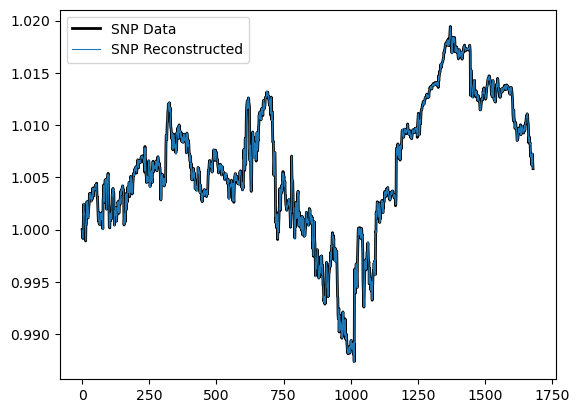

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(SNPData, label='SNP Data', linewidth=2, color= '#000000')
ax.plot(SNPConstructedFromWeights, label='SNP Reconstructed', linewidth=.8)

leg = plt.legend()

plt.savefig('leg_example')
plt.show()


As we can see, the issue with this method is not that we cannot find valid weights that give us an accurate picture of the index, but rather that we lack sufficient data to eliminate all but one (the real) weight choices and therefore deduce the SNP 500's true weights.